In [2]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd

M_Z = 91.187  # mass of Z boson (GeV)

In [3]:
sm = pd.read_csv("./data/SM_10k.csv")
o1 = pd.read_csv("./data/cW_1_10k.csv")
o2 = pd.read_csv("./data/cW_2_10k.csv")
# Apply cuts
sm = sm[
    (abs(sm["m_ll"] - M_Z) < 15) & (sm["m_jj"] > 300) & (abs(sm["delta_eta_jj"]) > 2.5)
]
o1 = o1[
    (abs(o1["m_ll"] - M_Z) < 15) & (o1["m_jj"] > 300) & (abs(o1["delta_eta_jj"]) > 2.5)
]
o2 = o2[
    (abs(o2["m_ll"] - M_Z) < 15) & (o2["m_jj"] > 300) & (abs(o2["delta_eta_jj"]) > 2.5)
]

selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_l2",
    "pt_j1",
    "pt_j2",
    "pt_ll",
    "eta_l1",
    "eta_l2",
    "eta_j1",
    "eta_j2",
    "delta_eta_jj",
    "delta_phi_jj",
]
sm_w = sm["cross_section_weight"]
o1_w = o1["cross_section_weight"]
o2_w = o2["cross_section_weight"]

sm = sm[selection]
o1 = o1[selection]
o2 = o2[selection]

(array([ 27.68328134,  79.33971353,  99.6027339 , 177.80086882,
        236.30677268, 241.15848178, 179.22784208,  99.03194459,
         71.0632686 ,  30.53722787]),
 array([-6.23349785, -4.98813628, -3.74277472, -2.49741315, -1.25205159,
        -0.00669002,  1.23867154,  2.48403311,  3.72939467,  4.97475624,
         6.2201178 ]),
 [<matplotlib.patches.Polygon at 0x7f48b6465670>])

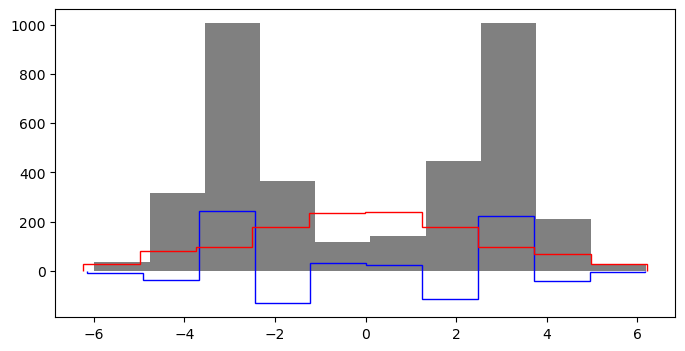

In [4]:
n_bins = 10
ci = 3
var = "delta_phi_jj"
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hist(sm[var], weights=sm_w, bins=n_bins, color="gray")
ax.hist(o1[var], weights=ci * o1_w, bins=n_bins, color="blue", histtype="step")
ax.hist(o2[var], weights=ci**2 * o2_w, bins=n_bins, color="red", histtype="step")

In [13]:
nbins = 200
var = "delta_phi_jj"
r__ = [-6.5, 6.5]
sm_h, _ = np.histogram(sm[var], nbins, weights=sm_w, range=r__)
lin_h, _ = np.histogram(o1[var], nbins, weights=o1_w, range=r__)
quad_h, _ = np.histogram(o2[var], nbins, weights=o2_w, range=r__)
c = np.linspace(-5, 2, 100)
chi = [sum((sm_h - (sm_h + (ci) * lin_h + (ci**2) * quad_h)) ** 2) for ci in c]

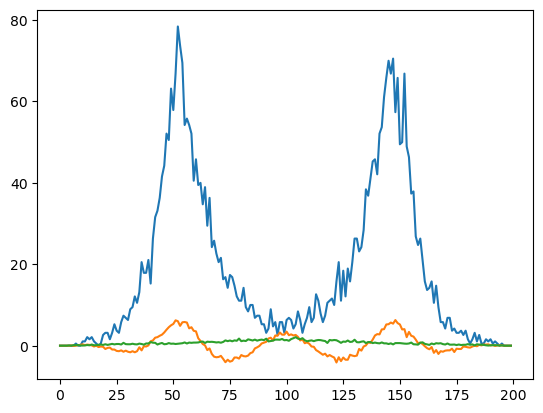

In [14]:
plt.plot(sm_h)
plt.plot(lin_h)
plt.plot(quad_h)

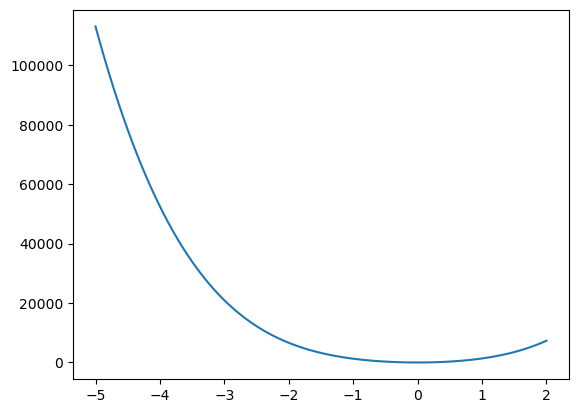

In [15]:
plt.plot(c, chi)